# Introduction to Convolutional Neural Networks

CSC/DSC 340 Week 10 Slides

Author: [Dr. Julie Butler](www.juliebutler.org)

Date Created: October 21, 2023

Last Modified: October 21, 2023

## Introduction and Termoinology

* This week we will cover convolutional neural networks (CNNs)
    * Image analysis, video analysis, object detection
* Note that we will not be going through any mathematics this week as the mathematics of CNNs is quite complicated but there are many good resources (including your textbook) if you are interested

* Convolution refers to the mathematical combination of two functions to produce a third function
    * It merges two sets of information
    * The convolution is performed on the input data with the use of a filter or kernel (these terms are used interchangeably) to then produce a feature map.

![CNNs](https://cdn-media-1.freecodecamp.org/images/Htskzls1pGp98-X2mHmVy9tCj0cYXkiCrQ4t)

[Image Source](https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2)

## Introduction to the MNIST Data Set
* Photos (28 pixels by 28 pixels) of handwritten numeric digits as the input
* Number shown in the photo as an output
* Challenges: 2D data structure (images), variations in handwriting, low quality images, size of data set (60,000 images in the training set, 10,000 in the test set)

### Import With Tensorflow
* Also avaliable through Scikit-Learn, but does not come automatically split into a training and test set

In [1]:
import tensorflow as tf

# Load MNIST data
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the data
train_images, test_images = train_images / 255.0, test_images / 255.0

# Print the shape of the data
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

/Users/butlerju/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


* Let's display some of the images

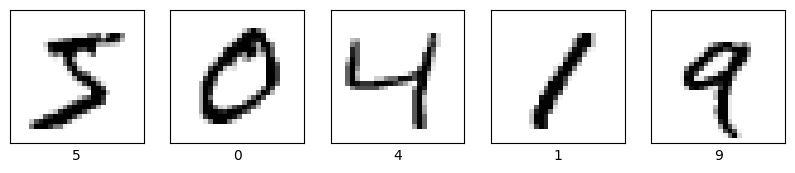

In [2]:
import matplotlib.pyplot as plt
# Display a small number of images
num_images = 5
plt.figure(figsize=(10, 3))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

* 60k is a lot of images to have in a training set (though may be needed for large neural networks)
* Let's randomly select 5k images to use for training instead of 60k so networks train faster
* Can use a smaller data set in the construction of your neural network (hyperparameter tuning process) but then use a larger sample to train the final network

In [3]:
import numpy as np
random_indices = np.random.choice(60000, 5000, replace=False)
train_images_smaller = train_images[random_indices]
train_labels_smaller = train_labels[random_indices]

* Classification can suffer from class imbalances. Let's make sure our data is relatively evenly distributed.

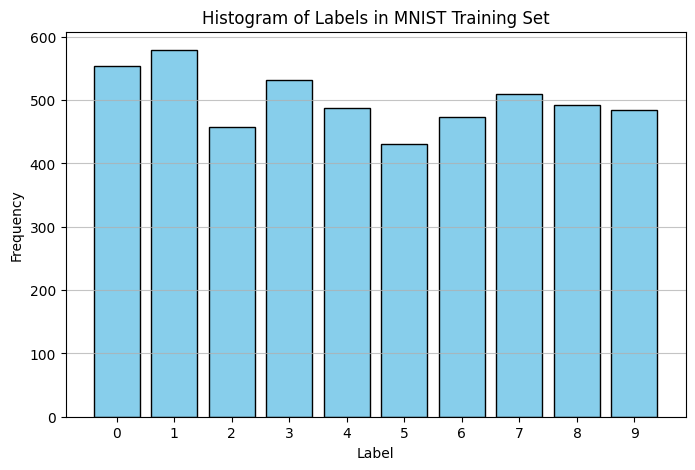

In [4]:
# Create a histogram of the labels
plt.figure(figsize=(8, 5))
plt.hist(train_labels_smaller, bins=range(11), align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.title('Histogram of Labels in MNIST Training Set')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(range(10))
plt.grid(axis='y', alpha=0.75)
plt.show()

## Classification with a Regular Neural Network
* We can clasify the MNIST data with a regular neural network, but due to its architecture we have to flatten the data before it can reach the dense layers
* Neural networks can be used to successfully classify images, but flattening the images can remove important patterns

* Create a model that flattens the data (28x28 pixel images). We then have one hidden layer with 128 neurons and a Relu activation function, and an output layer with 10 neurons (10 possible outputs) and a softmax activation function since this is a classification.

In [5]:
from tensorflow.keras import layers, models
# Build the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

* For compiling the model we will use the Adam optimizer, our metric of success will be accuracy, and our loss function is sparse categorical cross-entropy
    * Sparse categorical cross-entropy is similiar to categorical cross-entropy but while categorical cross-entropy requires the data to be one-hot encoded prior to training the model, sparse categorical cross-entropy does not

In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

* Train the model and the determine the accuracy

In [7]:
# Train the model
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5


   1/1875 [..............................] - ETA: 6:43 - loss: 2.3878 - accuracy: 0.0625

  15/1875 [..............................] - ETA: 6s - loss: 1.9213 - accuracy: 0.3979  

  35/1875 [..............................] - ETA: 5s - loss: 1.4539 - accuracy: 0.5982

  58/1875 [..............................] - ETA: 5s - loss: 1.1632 - accuracy: 0.6794

  76/1875 [>.............................] - ETA: 5s - loss: 1.0197 - accuracy: 0.7167

  96/1875 [>.............................] - ETA: 4s - loss: 0.9046 - accuracy: 0.7503

 118/1875 [>.............................] - ETA: 4s - loss: 0.8177 - accuracy: 0.7746

 143/1875 [=>............................] - ETA: 4s - loss: 0.7465 - accuracy: 0.7952

 166/1875 [=>............................] - ETA: 4s - loss: 0.6903 - accuracy: 0.8110

 192/1875 [==>...........................] - ETA: 4s - loss: 0.6536 - accuracy: 0.8210

 217/1875 [==>...........................] - ETA: 3s - loss: 0.6218 - accuracy: 0.8289

 240/1875 [==>...........................] - ETA: 3s - loss: 0.5960 - accuracy: 0.8359

 258/1875 [===>..........................] - ETA: 3s - loss: 0.5789 - accuracy: 0.8407

 273/1875 [===>..........................] - ETA: 3s - loss: 0.5659 - accuracy: 0.8442

 282/1875 [===>..........................] - ETA: 4s - loss: 0.5580 - accuracy: 0.8459

 298/1875 [===>..........................] - ETA: 4s - loss: 0.5480 - accuracy: 0.8486

 315/1875 [====>.........................] - ETA: 4s - loss: 0.5365 - accuracy: 0.8518

 332/1875 [====>.........................] - ETA: 4s - loss: 0.5236 - accuracy: 0.8559

 348/1875 [====>.........................] - ETA: 4s - loss: 0.5142 - accuracy: 0.8586

 371/1875 [====>.........................] - ETA: 4s - loss: 0.5017 - accuracy: 0.8614

 397/1875 [=====>........................] - ETA: 3s - loss: 0.4854 - accuracy: 0.8655

 421/1875 [=====>........................] - ETA: 3s - loss: 0.4730 - accuracy: 0.8692

 447/1875 [======>.......................] - ETA: 3s - loss: 0.4613 - accuracy: 0.8722

 471/1875 [======>.......................] - ETA: 3s - loss: 0.4532 - accuracy: 0.8740

 496/1875 [======>.......................] - ETA: 3s - loss: 0.4437 - accuracy: 0.8759

 520/1875 [=======>......................] - ETA: 3s - loss: 0.4365 - accuracy: 0.8776

 543/1875 [=======>......................] - ETA: 3s - loss: 0.4297 - accuracy: 0.8795

 569/1875 [========>.....................] - ETA: 3s - loss: 0.4224 - accuracy: 0.8817

 596/1875 [========>.....................] - ETA: 3s - loss: 0.4155 - accuracy: 0.8831

 619/1875 [========>.....................] - ETA: 3s - loss: 0.4102 - accuracy: 0.8844

 644/1875 [=========>....................] - ETA: 2s - loss: 0.4036 - accuracy: 0.8866

 667/1875 [=========>....................] - ETA: 2s - loss: 0.3993 - accuracy: 0.8876

 691/1875 [==========>...................] - ETA: 2s - loss: 0.3932 - accuracy: 0.8895

 716/1875 [==========>...................] - ETA: 2s - loss: 0.3872 - accuracy: 0.8915

 742/1875 [==========>...................] - ETA: 2s - loss: 0.3817 - accuracy: 0.8930

 766/1875 [===========>..................] - ETA: 2s - loss: 0.3768 - accuracy: 0.8941

 790/1875 [===========>..................] - ETA: 2s - loss: 0.3732 - accuracy: 0.8950

 815/1875 [============>.................] - ETA: 2s - loss: 0.3695 - accuracy: 0.8960

 839/1875 [============>.................] - ETA: 2s - loss: 0.3661 - accuracy: 0.8969

 865/1875 [============>.................] - ETA: 2s - loss: 0.3621 - accuracy: 0.8981

 891/1875 [=============>................] - ETA: 2s - loss: 0.3582 - accuracy: 0.8990

 914/1875 [=============>................] - ETA: 2s - loss: 0.3548 - accuracy: 0.9000

 939/1875 [==============>...............] - ETA: 2s - loss: 0.3507 - accuracy: 0.9010

 962/1875 [==============>...............] - ETA: 2s - loss: 0.3472 - accuracy: 0.9018

 987/1875 [==============>...............] - ETA: 2s - loss: 0.3446 - accuracy: 0.9025

1008/1875 [===============>..............] - ETA: 1s - loss: 0.3429 - accuracy: 0.9031

1032/1875 [===============>..............] - ETA: 1s - loss: 0.3401 - accuracy: 0.9038

1052/1875 [===============>..............] - ETA: 1s - loss: 0.3377 - accuracy: 0.9045

1069/1875 [================>.............] - ETA: 1s - loss: 0.3361 - accuracy: 0.9048

1094/1875 [================>.............] - ETA: 1s - loss: 0.3331 - accuracy: 0.9057

1120/1875 [================>.............] - ETA: 1s - loss: 0.3295 - accuracy: 0.9068

1144/1875 [=================>............] - ETA: 1s - loss: 0.3273 - accuracy: 0.9073

1170/1875 [=================>............] - ETA: 1s - loss: 0.3245 - accuracy: 0.9080

1196/1875 [==================>...........] - ETA: 1s - loss: 0.3210 - accuracy: 0.9089

1221/1875 [==================>...........] - ETA: 1s - loss: 0.3179 - accuracy: 0.9097

1250/1875 [===================>..........] - ETA: 1s - loss: 0.3147 - accuracy: 0.9108

1274/1875 [===================>..........] - ETA: 1s - loss: 0.3125 - accuracy: 0.9115

1300/1875 [===================>..........] - ETA: 1s - loss: 0.3100 - accuracy: 0.9122

1324/1875 [====================>.........] - ETA: 1s - loss: 0.3072 - accuracy: 0.9130

1349/1875 [====================>.........] - ETA: 1s - loss: 0.3047 - accuracy: 0.9136

1375/1875 [=====================>........] - ETA: 1s - loss: 0.3038 - accuracy: 0.9139

1392/1875 [=====================>........] - ETA: 1s - loss: 0.3026 - accuracy: 0.9142

1404/1875 [=====================>........] - ETA: 1s - loss: 0.3014 - accuracy: 0.9146

1422/1875 [=====================>........] - ETA: 1s - loss: 0.3000 - accuracy: 0.9150

1444/1875 [======================>.......] - ETA: 0s - loss: 0.2979 - accuracy: 0.9156

1463/1875 [======================>.......] - ETA: 0s - loss: 0.2959 - accuracy: 0.9162

1486/1875 [======================>.......] - ETA: 0s - loss: 0.2936 - accuracy: 0.9167

1524/1875 [=======================>......] - ETA: 0s - loss: 0.2901 - accuracy: 0.9175

1568/1875 [========================>.....] - ETA: 0s - loss: 0.2874 - accuracy: 0.9183

1605/1875 [========================>.....] - ETA: 0s - loss: 0.2845 - accuracy: 0.9191

1649/1875 [=========================>....] - ETA: 0s - loss: 0.2811 - accuracy: 0.9202

1683/1875 [=========================>....] - ETA: 0s - loss: 0.2791 - accuracy: 0.9209

1715/1875 [==========================>...] - ETA: 0s - loss: 0.2768 - accuracy: 0.9216

1745/1875 [==========================>...] - ETA: 0s - loss: 0.2747 - accuracy: 0.9220

1769/1875 [===========================>..] - ETA: 0s - loss: 0.2737 - accuracy: 0.9223

1794/1875 [===========================>..] - ETA: 0s - loss: 0.2725 - accuracy: 0.9227

1828/1875 [============================>.] - ETA: 0s - loss: 0.2707 - accuracy: 0.9231

1862/1875 [============================>.] - ETA: 0s - loss: 0.2684 - accuracy: 0.9236

1875/1875 [==============================] - 5s 2ms/step - loss: 0.2677 - accuracy: 0.9237 - val_loss: 0.1440 - val_accuracy: 0.9548


Epoch 2/5


   1/1875 [..............................] - ETA: 3s - loss: 0.0479 - accuracy: 1.0000

  52/1875 [..............................] - ETA: 1s - loss: 0.1135 - accuracy: 0.9657

 118/1875 [>.............................] - ETA: 1s - loss: 0.1277 - accuracy: 0.9632

 180/1875 [=>............................] - ETA: 1s - loss: 0.1273 - accuracy: 0.9623

 237/1875 [==>...........................] - ETA: 1s - loss: 0.1288 - accuracy: 0.9631

 288/1875 [===>..........................] - ETA: 1s - loss: 0.1301 - accuracy: 0.9615

 338/1875 [====>.........................] - ETA: 1s - loss: 0.1323 - accuracy: 0.9613

 386/1875 [=====>........................] - ETA: 1s - loss: 0.1322 - accuracy: 0.9611

 436/1875 [=====>........................] - ETA: 1s - loss: 0.1318 - accuracy: 0.9613

 479/1875 [======>.......................] - ETA: 1s - loss: 0.1306 - accuracy: 0.9616

 514/1875 [=======>......................] - ETA: 1s - loss: 0.1296 - accuracy: 0.9619

 553/1875 [=======>......................] - ETA: 1s - loss: 0.1307 - accuracy: 0.9612

 611/1875 [========>.....................] - ETA: 1s - loss: 0.1282 - accuracy: 0.9618

 668/1875 [=========>....................] - ETA: 1s - loss: 0.1270 - accuracy: 0.9625

 712/1875 [==========>...................] - ETA: 1s - loss: 0.1266 - accuracy: 0.9625

 748/1875 [==========>...................] - ETA: 1s - loss: 0.1262 - accuracy: 0.9626

 782/1875 [===========>..................] - ETA: 1s - loss: 0.1258 - accuracy: 0.9626

 816/1875 [============>.................] - ETA: 1s - loss: 0.1256 - accuracy: 0.9625

 851/1875 [============>.................] - ETA: 1s - loss: 0.1250 - accuracy: 0.9626

 886/1875 [=============>................] - ETA: 1s - loss: 0.1243 - accuracy: 0.9629

 916/1875 [=============>................] - ETA: 1s - loss: 0.1233 - accuracy: 0.9632

 949/1875 [==============>...............] - ETA: 1s - loss: 0.1241 - accuracy: 0.9630

 985/1875 [==============>...............] - ETA: 1s - loss: 0.1238 - accuracy: 0.9630

1021/1875 [===============>..............] - ETA: 0s - loss: 0.1230 - accuracy: 0.9634

1045/1875 [===============>..............] - ETA: 0s - loss: 0.1237 - accuracy: 0.9634

1068/1875 [================>.............] - ETA: 0s - loss: 0.1238 - accuracy: 0.9635

1089/1875 [================>.............] - ETA: 0s - loss: 0.1236 - accuracy: 0.9635

1121/1875 [================>.............] - ETA: 0s - loss: 0.1246 - accuracy: 0.9633

1159/1875 [=================>............] - ETA: 0s - loss: 0.1239 - accuracy: 0.9634

1215/1875 [==================>...........] - ETA: 0s - loss: 0.1234 - accuracy: 0.9633

1278/1875 [===================>..........] - ETA: 0s - loss: 0.1225 - accuracy: 0.9634

1344/1875 [====================>.........] - ETA: 0s - loss: 0.1218 - accuracy: 0.9634

1424/1875 [=====================>........] - ETA: 0s - loss: 0.1214 - accuracy: 0.9634

1505/1875 [=======================>......] - ETA: 0s - loss: 0.1220 - accuracy: 0.9633

1581/1875 [========================>.....] - ETA: 0s - loss: 0.1214 - accuracy: 0.9634

1654/1875 [=========================>....] - ETA: 0s - loss: 0.1211 - accuracy: 0.9637

1727/1875 [==========================>...] - ETA: 0s - loss: 0.1202 - accuracy: 0.9639

1802/1875 [===========================>..] - ETA: 0s - loss: 0.1190 - accuracy: 0.9643

1875/1875 [==============================] - 2s 1ms/step - loss: 0.1185 - accuracy: 0.9643 - val_loss: 0.0999 - val_accuracy: 0.9688


Epoch 3/5


   1/1875 [..............................] - ETA: 2s - loss: 0.0160 - accuracy: 1.0000

  81/1875 [>.............................] - ETA: 1s - loss: 0.0751 - accuracy: 0.9761

 158/1875 [=>............................] - ETA: 1s - loss: 0.0795 - accuracy: 0.9755

 233/1875 [==>...........................] - ETA: 1s - loss: 0.0732 - accuracy: 0.9780

 310/1875 [===>..........................] - ETA: 1s - loss: 0.0753 - accuracy: 0.9776

 388/1875 [=====>........................] - ETA: 0s - loss: 0.0766 - accuracy: 0.9770

 468/1875 [======>.......................] - ETA: 0s - loss: 0.0783 - accuracy: 0.9770

 543/1875 [=======>......................] - ETA: 0s - loss: 0.0763 - accuracy: 0.9778

 619/1875 [========>.....................] - ETA: 0s - loss: 0.0771 - accuracy: 0.9774

 700/1875 [==========>...................] - ETA: 0s - loss: 0.0790 - accuracy: 0.9767

 777/1875 [===========>..................] - ETA: 0s - loss: 0.0801 - accuracy: 0.9761

 857/1875 [============>.................] - ETA: 0s - loss: 0.0796 - accuracy: 0.9762

 937/1875 [=============>................] - ETA: 0s - loss: 0.0791 - accuracy: 0.9763

1013/1875 [===============>..............] - ETA: 0s - loss: 0.0801 - accuracy: 0.9761

1091/1875 [================>.............] - ETA: 0s - loss: 0.0809 - accuracy: 0.9759

1169/1875 [=================>............] - ETA: 0s - loss: 0.0811 - accuracy: 0.9758

1248/1875 [==================>...........] - ETA: 0s - loss: 0.0813 - accuracy: 0.9757

1325/1875 [====================>.........] - ETA: 0s - loss: 0.0805 - accuracy: 0.9760

1405/1875 [=====================>........] - ETA: 0s - loss: 0.0804 - accuracy: 0.9761

1486/1875 [======================>.......] - ETA: 0s - loss: 0.0808 - accuracy: 0.9761

1562/1875 [=======================>......] - ETA: 0s - loss: 0.0807 - accuracy: 0.9760

1640/1875 [=========================>....] - ETA: 0s - loss: 0.0810 - accuracy: 0.9758

1720/1875 [==========================>...] - ETA: 0s - loss: 0.0809 - accuracy: 0.9756

1799/1875 [===========================>..] - ETA: 0s - loss: 0.0811 - accuracy: 0.9754

1875/1875 [==============================] - ETA: 0s - loss: 0.0809 - accuracy: 0.9754

1875/1875 [==============================] - 1s 713us/step - loss: 0.0809 - accuracy: 0.9754 - val_loss: 0.0893 - val_accuracy: 0.9727


Epoch 4/5


   1/1875 [..............................] - ETA: 2s - loss: 0.1593 - accuracy: 0.9688

  78/1875 [>.............................] - ETA: 1s - loss: 0.0652 - accuracy: 0.9824

 157/1875 [=>............................] - ETA: 1s - loss: 0.0598 - accuracy: 0.9821

 236/1875 [==>...........................] - ETA: 1s - loss: 0.0565 - accuracy: 0.9831

 313/1875 [====>.........................] - ETA: 1s - loss: 0.0548 - accuracy: 0.9837

 392/1875 [=====>........................] - ETA: 0s - loss: 0.0561 - accuracy: 0.9832

 471/1875 [======>.......................] - ETA: 0s - loss: 0.0574 - accuracy: 0.9824

 546/1875 [=======>......................] - ETA: 0s - loss: 0.0590 - accuracy: 0.9820

 625/1875 [=========>....................] - ETA: 0s - loss: 0.0600 - accuracy: 0.9819

 703/1875 [==========>...................] - ETA: 0s - loss: 0.0592 - accuracy: 0.9819

 781/1875 [===========>..................] - ETA: 0s - loss: 0.0587 - accuracy: 0.9818

 859/1875 [============>.................] - ETA: 0s - loss: 0.0581 - accuracy: 0.9820

 938/1875 [==============>...............] - ETA: 0s - loss: 0.0580 - accuracy: 0.9822

1017/1875 [===============>..............] - ETA: 0s - loss: 0.0583 - accuracy: 0.9823

1093/1875 [================>.............] - ETA: 0s - loss: 0.0581 - accuracy: 0.9823

1171/1875 [=================>............] - ETA: 0s - loss: 0.0591 - accuracy: 0.9819

1250/1875 [===================>..........] - ETA: 0s - loss: 0.0590 - accuracy: 0.9821

1327/1875 [====================>.........] - ETA: 0s - loss: 0.0589 - accuracy: 0.9824

1408/1875 [=====================>........] - ETA: 0s - loss: 0.0596 - accuracy: 0.9822

1486/1875 [======================>.......] - ETA: 0s - loss: 0.0586 - accuracy: 0.9826

1563/1875 [========================>.....] - ETA: 0s - loss: 0.0590 - accuracy: 0.9825

1641/1875 [=========================>....] - ETA: 0s - loss: 0.0594 - accuracy: 0.9822

1722/1875 [==========================>...] - ETA: 0s - loss: 0.0589 - accuracy: 0.9823

1800/1875 [===========================>..] - ETA: 0s - loss: 0.0593 - accuracy: 0.9822

1875/1875 [==============================] - 1s 711us/step - loss: 0.0595 - accuracy: 0.9820 - val_loss: 0.0790 - val_accuracy: 0.9751


Epoch 5/5


   1/1875 [..............................] - ETA: 2s - loss: 0.0923 - accuracy: 0.9688

  74/1875 [>.............................] - ETA: 1s - loss: 0.0440 - accuracy: 0.9852

 151/1875 [=>............................] - ETA: 1s - loss: 0.0411 - accuracy: 0.9894

 229/1875 [==>...........................] - ETA: 1s - loss: 0.0423 - accuracy: 0.9877

 305/1875 [===>..........................] - ETA: 1s - loss: 0.0455 - accuracy: 0.9866

 383/1875 [=====>........................] - ETA: 0s - loss: 0.0430 - accuracy: 0.9869

 462/1875 [======>.......................] - ETA: 0s - loss: 0.0437 - accuracy: 0.9869

 538/1875 [=======>......................] - ETA: 0s - loss: 0.0433 - accuracy: 0.9869

 615/1875 [========>.....................] - ETA: 0s - loss: 0.0436 - accuracy: 0.9868

 693/1875 [==========>...................] - ETA: 0s - loss: 0.0425 - accuracy: 0.9872

 772/1875 [===========>..................] - ETA: 0s - loss: 0.0420 - accuracy: 0.9873

 846/1875 [============>.................] - ETA: 0s - loss: 0.0430 - accuracy: 0.9870

 925/1875 [=============>................] - ETA: 0s - loss: 0.0440 - accuracy: 0.9866

1004/1875 [===============>..............] - ETA: 0s - loss: 0.0436 - accuracy: 0.9867

1079/1875 [================>.............] - ETA: 0s - loss: 0.0439 - accuracy: 0.9866

1159/1875 [=================>............] - ETA: 0s - loss: 0.0436 - accuracy: 0.9867

1237/1875 [==================>...........] - ETA: 0s - loss: 0.0437 - accuracy: 0.9867

1314/1875 [====================>.........] - ETA: 0s - loss: 0.0436 - accuracy: 0.9868

1389/1875 [=====================>........] - ETA: 0s - loss: 0.0441 - accuracy: 0.9866

1468/1875 [======================>.......] - ETA: 0s - loss: 0.0445 - accuracy: 0.9864

1546/1875 [=======================>......] - ETA: 0s - loss: 0.0454 - accuracy: 0.9863

1622/1875 [========================>.....] - ETA: 0s - loss: 0.0459 - accuracy: 0.9861

1696/1875 [==========================>...] - ETA: 0s - loss: 0.0466 - accuracy: 0.9859

1767/1875 [===========================>..] - ETA: 0s - loss: 0.0465 - accuracy: 0.9860

1844/1875 [============================>.] - ETA: 0s - loss: 0.0465 - accuracy: 0.9859

1875/1875 [==============================] - 1s 724us/step - loss: 0.0465 - accuracy: 0.9860 - val_loss: 0.0762 - val_accuracy: 0.9778


313/313 - 0s - loss: 0.0762 - accuracy: 0.9778 - 125ms/epoch - 401us/step



Test accuracy: 0.9778000116348267


* When we perform classification without one-hot encoding, the outputs of the model are not the class labels, but rather the probability that the input belongs to each class

In [8]:
# Predict the test set
y_pred = model.predict(test_images)
print(y_pred[0])

  1/313 [..............................] - ETA: 9s

 81/313 [======>.......................] - ETA: 0s

168/313 [===============>..............] - ETA: 0s

252/313 [=======================>......] - ETA: 0s

313/313 [==============================] - 0s 558us/step


[1.4723141e-06 5.8828937e-07 4.2782191e-05 2.3619260e-03 3.7411579e-10
 2.6128657e-06 1.7655116e-12 9.9747354e-01 4.4202438e-06 1.1270488e-04]


* Before performing further anaysis on our neural network outputs, we need to convert the data from probabilities to the actual class label

In [9]:
# Predict the test set
y_pred = np.argmax(model.predict(test_images), axis=-1)

print(y_pred[0])

  1/313 [..............................] - ETA: 2s

133/313 [===========>..................] - ETA: 0s

265/313 [========================>.....] - ETA: 0s

313/313 [==============================] - 0s 382us/step


7


* Now let's create a confusion matrix to see which points are being misclassified

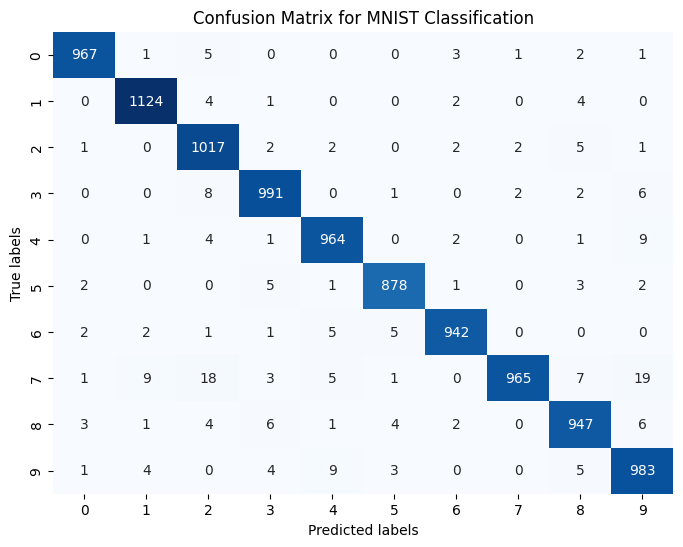

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(test_labels, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for MNIST Classification')
plt.show()

## Classification with a Convolutional Neural Network



### Types of Layers and Keras Syntax

* Conv2D
    * [Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)
    * The first number is the number of filters (dimensionality of the output)
    * The tuple is the stride (the width and height of the section of pixels to be reduced down)
    * Activation has the same function here as in regular neural networks
    * Convolutional layers apply learnable filters to the data that creates a feature map to a higher or lower dimensional space
    * Used to detect important features and patterns in the data
* MaxPooling2D
    * [Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPooling2D)
    * Tuple is the pool size (the size block over which to find the maximum)
    * Pooling layers reduce the dimensionality of the data while keeping the most important features
    * Two types of pooling layers: max pooling and average pooling
* Stacking convolutional and pooling layers allows CNNS to learn in a heirarchical manner
    * First the networks learns basic featutes of the data (like edges and textures) and then more complicated features
    * This heirarchical learning is what makes CNNS so effective at image analysis
* Note that not every convolutional layer has to be followed by a pooling layer, too many pooling layers can be bad

### Full Neural Network for Classification
* Have two pairs of convolutional layers/pooling layers of different sizes followed by a lone convolutional layer
* The `Flatten()` layer is needed to take the 2D data down to one dimension for the dense layers
* The first dense layer (a hidden layer) does some post-processing on the data that comes from the CNN layers, the second dense layer is the output layer

In [11]:
# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

* Model is compiled, trained, and tested in the same way as the regular neural network

In [12]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5


  1/844 [..............................] - ETA: 2:08 - loss: 2.3094 - accuracy: 0.0625

  6/844 [..............................] - ETA: 8s - loss: 2.2485 - accuracy: 0.2552  

 12/844 [..............................] - ETA: 8s - loss: 2.1548 - accuracy: 0.3385

 18/844 [..............................] - ETA: 8s - loss: 1.9899 - accuracy: 0.4201

 23/844 [..............................] - ETA: 8s - loss: 1.8154 - accuracy: 0.4742

 29/844 [>.............................] - ETA: 8s - loss: 1.6284 - accuracy: 0.5253

 34/844 [>.............................] - ETA: 8s - loss: 1.4902 - accuracy: 0.5685

 39/844 [>.............................] - ETA: 8s - loss: 1.3798 - accuracy: 0.5994

 44/844 [>.............................] - ETA: 8s - loss: 1.2836 - accuracy: 0.6286

 49/844 [>.............................] - ETA: 8s - loss: 1.1919 - accuracy: 0.6569

 54/844 [>.............................] - ETA: 8s - loss: 1.1324 - accuracy: 0.6745

 59/844 [=>............................] - ETA: 8s - loss: 1.0813 - accuracy: 0.6883

 64/844 [=>............................] - ETA: 8s - loss: 1.0310 - accuracy: 0.7024

 69/844 [=>............................] - ETA: 8s - loss: 0.9878 - accuracy: 0.7149

 74/844 [=>............................] - ETA: 8s - loss: 0.9485 - accuracy: 0.7261

 79/844 [=>............................] - ETA: 7s - loss: 0.9162 - accuracy: 0.7336

 84/844 [=>............................] - ETA: 7s - loss: 0.8794 - accuracy: 0.7439

 89/844 [==>...........................] - ETA: 7s - loss: 0.8528 - accuracy: 0.7504

 94/844 [==>...........................] - ETA: 7s - loss: 0.8260 - accuracy: 0.7575

 99/844 [==>...........................] - ETA: 7s - loss: 0.8010 - accuracy: 0.7647

104/844 [==>...........................] - ETA: 7s - loss: 0.7769 - accuracy: 0.7709

109/844 [==>...........................] - ETA: 7s - loss: 0.7552 - accuracy: 0.7767

114/844 [===>..........................] - ETA: 7s - loss: 0.7366 - accuracy: 0.7823

119/844 [===>..........................] - ETA: 7s - loss: 0.7169 - accuracy: 0.7879

124/844 [===>..........................] - ETA: 7s - loss: 0.6985 - accuracy: 0.7931

129/844 [===>..........................] - ETA: 7s - loss: 0.6815 - accuracy: 0.7981

134/844 [===>..........................] - ETA: 7s - loss: 0.6656 - accuracy: 0.8021

139/844 [===>..........................] - ETA: 7s - loss: 0.6487 - accuracy: 0.8069

144/844 [====>.........................] - ETA: 7s - loss: 0.6326 - accuracy: 0.8112

149/844 [====>.........................] - ETA: 7s - loss: 0.6173 - accuracy: 0.8155

154/844 [====>.........................] - ETA: 7s - loss: 0.6066 - accuracy: 0.8184

159/844 [====>.........................] - ETA: 7s - loss: 0.5952 - accuracy: 0.8219

164/844 [====>.........................] - ETA: 7s - loss: 0.5844 - accuracy: 0.8250

169/844 [=====>........................] - ETA: 7s - loss: 0.5724 - accuracy: 0.8286

174/844 [=====>........................] - ETA: 7s - loss: 0.5606 - accuracy: 0.8323

179/844 [=====>........................] - ETA: 7s - loss: 0.5504 - accuracy: 0.8353

184/844 [=====>........................] - ETA: 7s - loss: 0.5408 - accuracy: 0.8385

189/844 [=====>........................] - ETA: 7s - loss: 0.5314 - accuracy: 0.8409

194/844 [=====>........................] - ETA: 6s - loss: 0.5237 - accuracy: 0.8436

199/844 [======>.......................] - ETA: 6s - loss: 0.5158 - accuracy: 0.8463

204/844 [======>.......................] - ETA: 6s - loss: 0.5072 - accuracy: 0.8490

209/844 [======>.......................] - ETA: 6s - loss: 0.4987 - accuracy: 0.8515

214/844 [======>.......................] - ETA: 6s - loss: 0.4902 - accuracy: 0.8543

219/844 [======>.......................] - ETA: 6s - loss: 0.4842 - accuracy: 0.8561

224/844 [======>.......................] - ETA: 6s - loss: 0.4778 - accuracy: 0.8580

229/844 [=======>......................] - ETA: 6s - loss: 0.4702 - accuracy: 0.8601

234/844 [=======>......................] - ETA: 6s - loss: 0.4643 - accuracy: 0.8618

239/844 [=======>......................] - ETA: 6s - loss: 0.4583 - accuracy: 0.8634

244/844 [=======>......................] - ETA: 6s - loss: 0.4521 - accuracy: 0.8653

249/844 [=======>......................] - ETA: 6s - loss: 0.4466 - accuracy: 0.8669

254/844 [========>.....................] - ETA: 6s - loss: 0.4407 - accuracy: 0.8687

259/844 [========>.....................] - ETA: 6s - loss: 0.4360 - accuracy: 0.8701

264/844 [========>.....................] - ETA: 6s - loss: 0.4306 - accuracy: 0.8716

269/844 [========>.....................] - ETA: 6s - loss: 0.4259 - accuracy: 0.8727

274/844 [========>.....................] - ETA: 6s - loss: 0.4220 - accuracy: 0.8739

279/844 [========>.....................] - ETA: 6s - loss: 0.4166 - accuracy: 0.8756

284/844 [=========>....................] - ETA: 6s - loss: 0.4119 - accuracy: 0.8771

289/844 [=========>....................] - ETA: 6s - loss: 0.4068 - accuracy: 0.8786

294/844 [=========>....................] - ETA: 6s - loss: 0.4016 - accuracy: 0.8802

299/844 [=========>....................] - ETA: 5s - loss: 0.3978 - accuracy: 0.8814

304/844 [=========>....................] - ETA: 5s - loss: 0.3937 - accuracy: 0.8823

309/844 [=========>....................] - ETA: 5s - loss: 0.3889 - accuracy: 0.8836

314/844 [==========>...................] - ETA: 5s - loss: 0.3852 - accuracy: 0.8846

319/844 [==========>...................] - ETA: 5s - loss: 0.3808 - accuracy: 0.8859

324/844 [==========>...................] - ETA: 5s - loss: 0.3767 - accuracy: 0.8870

329/844 [==========>...................] - ETA: 5s - loss: 0.3729 - accuracy: 0.8881

334/844 [==========>...................] - ETA: 5s - loss: 0.3687 - accuracy: 0.8894

338/844 [===========>..................] - ETA: 5s - loss: 0.3660 - accuracy: 0.8903

343/844 [===========>..................] - ETA: 5s - loss: 0.3624 - accuracy: 0.8912

348/844 [===========>..................] - ETA: 5s - loss: 0.3593 - accuracy: 0.8919

353/844 [===========>..................] - ETA: 5s - loss: 0.3555 - accuracy: 0.8930

358/844 [===========>..................] - ETA: 5s - loss: 0.3525 - accuracy: 0.8939

363/844 [===========>..................] - ETA: 5s - loss: 0.3487 - accuracy: 0.8950

368/844 [============>.................] - ETA: 5s - loss: 0.3452 - accuracy: 0.8960

373/844 [============>.................] - ETA: 5s - loss: 0.3419 - accuracy: 0.8968

378/844 [============>.................] - ETA: 5s - loss: 0.3382 - accuracy: 0.8979

383/844 [============>.................] - ETA: 5s - loss: 0.3351 - accuracy: 0.8988

388/844 [============>.................] - ETA: 5s - loss: 0.3323 - accuracy: 0.8997

393/844 [============>.................] - ETA: 4s - loss: 0.3295 - accuracy: 0.9006

398/844 [=============>................] - ETA: 4s - loss: 0.3267 - accuracy: 0.9015

402/844 [=============>................] - ETA: 4s - loss: 0.3242 - accuracy: 0.9023

407/844 [=============>................] - ETA: 4s - loss: 0.3213 - accuracy: 0.9032

412/844 [=============>................] - ETA: 4s - loss: 0.3185 - accuracy: 0.9040

417/844 [=============>................] - ETA: 4s - loss: 0.3154 - accuracy: 0.9049

422/844 [==============>...............] - ETA: 4s - loss: 0.3126 - accuracy: 0.9057

427/844 [==============>...............] - ETA: 4s - loss: 0.3101 - accuracy: 0.9064

432/844 [==============>...............] - ETA: 4s - loss: 0.3072 - accuracy: 0.9073

437/844 [==============>...............] - ETA: 4s - loss: 0.3049 - accuracy: 0.9080

442/844 [==============>...............] - ETA: 4s - loss: 0.3028 - accuracy: 0.9087

447/844 [==============>...............] - ETA: 4s - loss: 0.3005 - accuracy: 0.9093

452/844 [===============>..............] - ETA: 4s - loss: 0.2982 - accuracy: 0.9100

457/844 [===============>..............] - ETA: 4s - loss: 0.2959 - accuracy: 0.9107

462/844 [===============>..............] - ETA: 4s - loss: 0.2942 - accuracy: 0.9113

467/844 [===============>..............] - ETA: 4s - loss: 0.2922 - accuracy: 0.9119

472/844 [===============>..............] - ETA: 4s - loss: 0.2898 - accuracy: 0.9126

477/844 [===============>..............] - ETA: 4s - loss: 0.2879 - accuracy: 0.9132

482/844 [================>.............] - ETA: 4s - loss: 0.2863 - accuracy: 0.9138

487/844 [================>.............] - ETA: 3s - loss: 0.2847 - accuracy: 0.9143

492/844 [================>.............] - ETA: 3s - loss: 0.2822 - accuracy: 0.9151

497/844 [================>.............] - ETA: 3s - loss: 0.2802 - accuracy: 0.9156

502/844 [================>.............] - ETA: 3s - loss: 0.2785 - accuracy: 0.9161

507/844 [=================>............] - ETA: 3s - loss: 0.2767 - accuracy: 0.9167

512/844 [=================>............] - ETA: 3s - loss: 0.2752 - accuracy: 0.9171

517/844 [=================>............] - ETA: 3s - loss: 0.2735 - accuracy: 0.9176

522/844 [=================>............] - ETA: 3s - loss: 0.2717 - accuracy: 0.9181

527/844 [=================>............] - ETA: 3s - loss: 0.2704 - accuracy: 0.9185

532/844 [=================>............] - ETA: 3s - loss: 0.2685 - accuracy: 0.9191

537/844 [==================>...........] - ETA: 3s - loss: 0.2672 - accuracy: 0.9195

542/844 [==================>...........] - ETA: 3s - loss: 0.2654 - accuracy: 0.9200

547/844 [==================>...........] - ETA: 3s - loss: 0.2636 - accuracy: 0.9207

552/844 [==================>...........] - ETA: 3s - loss: 0.2617 - accuracy: 0.9212

557/844 [==================>...........] - ETA: 3s - loss: 0.2602 - accuracy: 0.9217

562/844 [==================>...........] - ETA: 3s - loss: 0.2588 - accuracy: 0.9222

567/844 [===================>..........] - ETA: 3s - loss: 0.2573 - accuracy: 0.9226

572/844 [===================>..........] - ETA: 3s - loss: 0.2556 - accuracy: 0.9231

577/844 [===================>..........] - ETA: 3s - loss: 0.2539 - accuracy: 0.9236

581/844 [===================>..........] - ETA: 2s - loss: 0.2527 - accuracy: 0.9239

585/844 [===================>..........] - ETA: 2s - loss: 0.2512 - accuracy: 0.9243

590/844 [===================>..........] - ETA: 2s - loss: 0.2501 - accuracy: 0.9247

595/844 [====================>.........] - ETA: 2s - loss: 0.2489 - accuracy: 0.9250

600/844 [====================>.........] - ETA: 2s - loss: 0.2475 - accuracy: 0.9254

605/844 [====================>.........] - ETA: 2s - loss: 0.2461 - accuracy: 0.9257

610/844 [====================>.........] - ETA: 2s - loss: 0.2448 - accuracy: 0.9261

615/844 [====================>.........] - ETA: 2s - loss: 0.2436 - accuracy: 0.9265

620/844 [=====================>........] - ETA: 2s - loss: 0.2420 - accuracy: 0.9270

625/844 [=====================>........] - ETA: 2s - loss: 0.2406 - accuracy: 0.9273

629/844 [=====================>........] - ETA: 2s - loss: 0.2397 - accuracy: 0.9276

634/844 [=====================>........] - ETA: 2s - loss: 0.2383 - accuracy: 0.9279

639/844 [=====================>........] - ETA: 2s - loss: 0.2370 - accuracy: 0.9283

643/844 [=====================>........] - ETA: 2s - loss: 0.2361 - accuracy: 0.9285

648/844 [======================>.......] - ETA: 2s - loss: 0.2350 - accuracy: 0.9288

653/844 [======================>.......] - ETA: 2s - loss: 0.2337 - accuracy: 0.9292

658/844 [======================>.......] - ETA: 2s - loss: 0.2326 - accuracy: 0.9296

663/844 [======================>.......] - ETA: 2s - loss: 0.2314 - accuracy: 0.9301

668/844 [======================>.......] - ETA: 1s - loss: 0.2301 - accuracy: 0.9305

673/844 [======================>.......] - ETA: 1s - loss: 0.2291 - accuracy: 0.9308

678/844 [=======================>......] - ETA: 1s - loss: 0.2280 - accuracy: 0.9311

683/844 [=======================>......] - ETA: 1s - loss: 0.2269 - accuracy: 0.9315

688/844 [=======================>......] - ETA: 1s - loss: 0.2257 - accuracy: 0.9319

693/844 [=======================>......] - ETA: 1s - loss: 0.2244 - accuracy: 0.9322

698/844 [=======================>......] - ETA: 1s - loss: 0.2235 - accuracy: 0.9326

703/844 [=======================>......] - ETA: 1s - loss: 0.2225 - accuracy: 0.9329

708/844 [========================>.....] - ETA: 1s - loss: 0.2216 - accuracy: 0.9332

713/844 [========================>.....] - ETA: 1s - loss: 0.2207 - accuracy: 0.9334

718/844 [========================>.....] - ETA: 1s - loss: 0.2197 - accuracy: 0.9337

723/844 [========================>.....] - ETA: 1s - loss: 0.2189 - accuracy: 0.9339

728/844 [========================>.....] - ETA: 1s - loss: 0.2179 - accuracy: 0.9343

733/844 [=========================>....] - ETA: 1s - loss: 0.2169 - accuracy: 0.9346

737/844 [=========================>....] - ETA: 1s - loss: 0.2160 - accuracy: 0.9348

742/844 [=========================>....] - ETA: 1s - loss: 0.2151 - accuracy: 0.9351

747/844 [=========================>....] - ETA: 1s - loss: 0.2144 - accuracy: 0.9354

751/844 [=========================>....] - ETA: 1s - loss: 0.2137 - accuracy: 0.9356

756/844 [=========================>....] - ETA: 0s - loss: 0.2130 - accuracy: 0.9358

761/844 [==========================>...] - ETA: 0s - loss: 0.2120 - accuracy: 0.9362

765/844 [==========================>...] - ETA: 0s - loss: 0.2113 - accuracy: 0.9364

769/844 [==========================>...] - ETA: 0s - loss: 0.2106 - accuracy: 0.9366

773/844 [==========================>...] - ETA: 0s - loss: 0.2097 - accuracy: 0.9369

776/844 [==========================>...] - ETA: 0s - loss: 0.2091 - accuracy: 0.9371

781/844 [==========================>...] - ETA: 0s - loss: 0.2080 - accuracy: 0.9374

786/844 [==========================>...] - ETA: 0s - loss: 0.2070 - accuracy: 0.9377

791/844 [===========================>..] - ETA: 0s - loss: 0.2061 - accuracy: 0.9379

796/844 [===========================>..] - ETA: 0s - loss: 0.2052 - accuracy: 0.9382

801/844 [===========================>..] - ETA: 0s - loss: 0.2044 - accuracy: 0.9384

805/844 [===========================>..] - ETA: 0s - loss: 0.2036 - accuracy: 0.9386

810/844 [===========================>..] - ETA: 0s - loss: 0.2026 - accuracy: 0.9389

815/844 [===========================>..] - ETA: 0s - loss: 0.2018 - accuracy: 0.9391

820/844 [============================>.] - ETA: 0s - loss: 0.2014 - accuracy: 0.9393

824/844 [============================>.] - ETA: 0s - loss: 0.2009 - accuracy: 0.9395

829/844 [============================>.] - ETA: 0s - loss: 0.2000 - accuracy: 0.9397

833/844 [============================>.] - ETA: 0s - loss: 0.1994 - accuracy: 0.9399

838/844 [============================>.] - ETA: 0s - loss: 0.1986 - accuracy: 0.9401

843/844 [============================>.] - ETA: 0s - loss: 0.1979 - accuracy: 0.9403

844/844 [==============================] - 10s 12ms/step - loss: 0.1977 - accuracy: 0.9403 - val_loss: 0.0629 - val_accuracy: 0.9805


Epoch 2/5


  1/844 [..............................] - ETA: 9s - loss: 0.1271 - accuracy: 0.9688

  6/844 [..............................] - ETA: 9s - loss: 0.0942 - accuracy: 0.9714

 11/844 [..............................] - ETA: 9s - loss: 0.0621 - accuracy: 0.9830

 16/844 [..............................] - ETA: 9s - loss: 0.0716 - accuracy: 0.9795

 21/844 [..............................] - ETA: 9s - loss: 0.0666 - accuracy: 0.9792

 25/844 [..............................] - ETA: 9s - loss: 0.0639 - accuracy: 0.9800

 30/844 [>.............................] - ETA: 9s - loss: 0.0616 - accuracy: 0.9812

 35/844 [>.............................] - ETA: 9s - loss: 0.0643 - accuracy: 0.9804

 40/844 [>.............................] - ETA: 9s - loss: 0.0655 - accuracy: 0.9809

 45/844 [>.............................] - ETA: 9s - loss: 0.0675 - accuracy: 0.9799

 50/844 [>.............................] - ETA: 9s - loss: 0.0671 - accuracy: 0.9803

 55/844 [>.............................] - ETA: 9s - loss: 0.0675 - accuracy: 0.9810

 60/844 [=>............................] - ETA: 9s - loss: 0.0639 - accuracy: 0.9815

 65/844 [=>............................] - ETA: 9s - loss: 0.0633 - accuracy: 0.9815

 69/844 [=>............................] - ETA: 9s - loss: 0.0636 - accuracy: 0.9814

 73/844 [=>............................] - ETA: 9s - loss: 0.0624 - accuracy: 0.9822

 78/844 [=>............................] - ETA: 9s - loss: 0.0636 - accuracy: 0.9820

 82/844 [=>............................] - ETA: 9s - loss: 0.0628 - accuracy: 0.9819

 87/844 [==>...........................] - ETA: 9s - loss: 0.0642 - accuracy: 0.9817

 92/844 [==>...........................] - ETA: 8s - loss: 0.0639 - accuracy: 0.9813

 97/844 [==>...........................] - ETA: 8s - loss: 0.0622 - accuracy: 0.9816

102/844 [==>...........................] - ETA: 8s - loss: 0.0607 - accuracy: 0.9819

107/844 [==>...........................] - ETA: 8s - loss: 0.0607 - accuracy: 0.9820

111/844 [==>...........................] - ETA: 8s - loss: 0.0613 - accuracy: 0.9820

116/844 [===>..........................] - ETA: 8s - loss: 0.0600 - accuracy: 0.9824

121/844 [===>..........................] - ETA: 8s - loss: 0.0610 - accuracy: 0.9819

125/844 [===>..........................] - ETA: 8s - loss: 0.0608 - accuracy: 0.9819

130/844 [===>..........................] - ETA: 8s - loss: 0.0614 - accuracy: 0.9812

134/844 [===>..........................] - ETA: 8s - loss: 0.0610 - accuracy: 0.9813

139/844 [===>..........................] - ETA: 8s - loss: 0.0600 - accuracy: 0.9817

144/844 [====>.........................] - ETA: 8s - loss: 0.0593 - accuracy: 0.9819

149/844 [====>.........................] - ETA: 8s - loss: 0.0605 - accuracy: 0.9816

154/844 [====>.........................] - ETA: 8s - loss: 0.0605 - accuracy: 0.9817

158/844 [====>.........................] - ETA: 8s - loss: 0.0597 - accuracy: 0.9820

163/844 [====>.........................] - ETA: 8s - loss: 0.0602 - accuracy: 0.9821

167/844 [====>.........................] - ETA: 8s - loss: 0.0599 - accuracy: 0.9822

172/844 [=====>........................] - ETA: 8s - loss: 0.0599 - accuracy: 0.9823

177/844 [=====>........................] - ETA: 8s - loss: 0.0597 - accuracy: 0.9823

182/844 [=====>........................] - ETA: 7s - loss: 0.0594 - accuracy: 0.9823

187/844 [=====>........................] - ETA: 7s - loss: 0.0605 - accuracy: 0.9817

192/844 [=====>........................] - ETA: 7s - loss: 0.0602 - accuracy: 0.9819

197/844 [======>.......................] - ETA: 7s - loss: 0.0600 - accuracy: 0.9818

202/844 [======>.......................] - ETA: 7s - loss: 0.0614 - accuracy: 0.9813

207/844 [======>.......................] - ETA: 7s - loss: 0.0613 - accuracy: 0.9814

212/844 [======>.......................] - ETA: 7s - loss: 0.0611 - accuracy: 0.9814

217/844 [======>.......................] - ETA: 7s - loss: 0.0604 - accuracy: 0.9815

222/844 [======>.......................] - ETA: 7s - loss: 0.0608 - accuracy: 0.9813

227/844 [=======>......................] - ETA: 7s - loss: 0.0613 - accuracy: 0.9811

232/844 [=======>......................] - ETA: 7s - loss: 0.0620 - accuracy: 0.9808

237/844 [=======>......................] - ETA: 7s - loss: 0.0616 - accuracy: 0.9809

242/844 [=======>......................] - ETA: 7s - loss: 0.0613 - accuracy: 0.9812

247/844 [=======>......................] - ETA: 7s - loss: 0.0610 - accuracy: 0.9813

252/844 [=======>......................] - ETA: 6s - loss: 0.0613 - accuracy: 0.9812

257/844 [========>.....................] - ETA: 6s - loss: 0.0613 - accuracy: 0.9812

262/844 [========>.....................] - ETA: 6s - loss: 0.0616 - accuracy: 0.9812

267/844 [========>.....................] - ETA: 6s - loss: 0.0625 - accuracy: 0.9811

272/844 [========>.....................] - ETA: 6s - loss: 0.0618 - accuracy: 0.9814

277/844 [========>.....................] - ETA: 6s - loss: 0.0613 - accuracy: 0.9815

282/844 [=========>....................] - ETA: 6s - loss: 0.0610 - accuracy: 0.9815

287/844 [=========>....................] - ETA: 6s - loss: 0.0617 - accuracy: 0.9814

291/844 [=========>....................] - ETA: 6s - loss: 0.0617 - accuracy: 0.9815

295/844 [=========>....................] - ETA: 6s - loss: 0.0614 - accuracy: 0.9816

299/844 [=========>....................] - ETA: 6s - loss: 0.0613 - accuracy: 0.9817

303/844 [=========>....................] - ETA: 6s - loss: 0.0610 - accuracy: 0.9818

308/844 [=========>....................] - ETA: 6s - loss: 0.0602 - accuracy: 0.9821

313/844 [==========>...................] - ETA: 6s - loss: 0.0601 - accuracy: 0.9821

318/844 [==========>...................] - ETA: 6s - loss: 0.0602 - accuracy: 0.9821

323/844 [==========>...................] - ETA: 6s - loss: 0.0600 - accuracy: 0.9821

328/844 [==========>...................] - ETA: 6s - loss: 0.0599 - accuracy: 0.9821

332/844 [==========>...................] - ETA: 6s - loss: 0.0598 - accuracy: 0.9822

337/844 [==========>...................] - ETA: 6s - loss: 0.0595 - accuracy: 0.9822

342/844 [===========>..................] - ETA: 5s - loss: 0.0596 - accuracy: 0.9821

346/844 [===========>..................] - ETA: 5s - loss: 0.0595 - accuracy: 0.9822

351/844 [===========>..................] - ETA: 5s - loss: 0.0591 - accuracy: 0.9823

356/844 [===========>..................] - ETA: 5s - loss: 0.0586 - accuracy: 0.9824

361/844 [===========>..................] - ETA: 5s - loss: 0.0590 - accuracy: 0.9823

365/844 [===========>..................] - ETA: 5s - loss: 0.0588 - accuracy: 0.9824

370/844 [============>.................] - ETA: 5s - loss: 0.0582 - accuracy: 0.9827

375/844 [============>.................] - ETA: 5s - loss: 0.0584 - accuracy: 0.9827

380/844 [============>.................] - ETA: 5s - loss: 0.0580 - accuracy: 0.9829

385/844 [============>.................] - ETA: 5s - loss: 0.0577 - accuracy: 0.9830

390/844 [============>.................] - ETA: 5s - loss: 0.0574 - accuracy: 0.9831

395/844 [=============>................] - ETA: 5s - loss: 0.0571 - accuracy: 0.9833

400/844 [=============>................] - ETA: 5s - loss: 0.0568 - accuracy: 0.9832

405/844 [=============>................] - ETA: 5s - loss: 0.0571 - accuracy: 0.9831

410/844 [=============>................] - ETA: 5s - loss: 0.0571 - accuracy: 0.9831

415/844 [=============>................] - ETA: 5s - loss: 0.0567 - accuracy: 0.9831

420/844 [=============>................] - ETA: 5s - loss: 0.0564 - accuracy: 0.9831

425/844 [==============>...............] - ETA: 4s - loss: 0.0568 - accuracy: 0.9831

430/844 [==============>...............] - ETA: 4s - loss: 0.0566 - accuracy: 0.9832

435/844 [==============>...............] - ETA: 4s - loss: 0.0565 - accuracy: 0.9832

440/844 [==============>...............] - ETA: 4s - loss: 0.0565 - accuracy: 0.9831

445/844 [==============>...............] - ETA: 4s - loss: 0.0563 - accuracy: 0.9832

449/844 [==============>...............] - ETA: 4s - loss: 0.0564 - accuracy: 0.9832

454/844 [===============>..............] - ETA: 4s - loss: 0.0561 - accuracy: 0.9832

459/844 [===============>..............] - ETA: 4s - loss: 0.0560 - accuracy: 0.9832

464/844 [===============>..............] - ETA: 4s - loss: 0.0559 - accuracy: 0.9832

469/844 [===============>..............] - ETA: 4s - loss: 0.0560 - accuracy: 0.9832

474/844 [===============>..............] - ETA: 4s - loss: 0.0558 - accuracy: 0.9833

479/844 [================>.............] - ETA: 4s - loss: 0.0558 - accuracy: 0.9832

484/844 [================>.............] - ETA: 4s - loss: 0.0557 - accuracy: 0.9831

489/844 [================>.............] - ETA: 4s - loss: 0.0556 - accuracy: 0.9832

494/844 [================>.............] - ETA: 4s - loss: 0.0554 - accuracy: 0.9832

499/844 [================>.............] - ETA: 4s - loss: 0.0555 - accuracy: 0.9832

504/844 [================>.............] - ETA: 4s - loss: 0.0556 - accuracy: 0.9832

509/844 [=================>............] - ETA: 3s - loss: 0.0559 - accuracy: 0.9830

514/844 [=================>............] - ETA: 3s - loss: 0.0557 - accuracy: 0.9831

519/844 [=================>............] - ETA: 3s - loss: 0.0558 - accuracy: 0.9830

524/844 [=================>............] - ETA: 3s - loss: 0.0561 - accuracy: 0.9829

529/844 [=================>............] - ETA: 3s - loss: 0.0559 - accuracy: 0.9829

534/844 [=================>............] - ETA: 3s - loss: 0.0559 - accuracy: 0.9829

539/844 [==================>...........] - ETA: 3s - loss: 0.0562 - accuracy: 0.9828

544/844 [==================>...........] - ETA: 3s - loss: 0.0560 - accuracy: 0.9829

549/844 [==================>...........] - ETA: 3s - loss: 0.0559 - accuracy: 0.9829

554/844 [==================>...........] - ETA: 3s - loss: 0.0561 - accuracy: 0.9828

559/844 [==================>...........] - ETA: 3s - loss: 0.0560 - accuracy: 0.9829

564/844 [===================>..........] - ETA: 3s - loss: 0.0557 - accuracy: 0.9830

568/844 [===================>..........] - ETA: 3s - loss: 0.0559 - accuracy: 0.9830

573/844 [===================>..........] - ETA: 3s - loss: 0.0561 - accuracy: 0.9830

577/844 [===================>..........] - ETA: 3s - loss: 0.0559 - accuracy: 0.9830

582/844 [===================>..........] - ETA: 3s - loss: 0.0559 - accuracy: 0.9830

587/844 [===================>..........] - ETA: 3s - loss: 0.0560 - accuracy: 0.9829

592/844 [====================>.........] - ETA: 2s - loss: 0.0561 - accuracy: 0.9829

596/844 [====================>.........] - ETA: 2s - loss: 0.0558 - accuracy: 0.9830

601/844 [====================>.........] - ETA: 2s - loss: 0.0557 - accuracy: 0.9831

606/844 [====================>.........] - ETA: 2s - loss: 0.0553 - accuracy: 0.9832

610/844 [====================>.........] - ETA: 2s - loss: 0.0553 - accuracy: 0.9832

615/844 [====================>.........] - ETA: 2s - loss: 0.0551 - accuracy: 0.9833

620/844 [=====================>........] - ETA: 2s - loss: 0.0550 - accuracy: 0.9833

625/844 [=====================>........] - ETA: 2s - loss: 0.0550 - accuracy: 0.9833

630/844 [=====================>........] - ETA: 2s - loss: 0.0550 - accuracy: 0.9833

635/844 [=====================>........] - ETA: 2s - loss: 0.0547 - accuracy: 0.9835

640/844 [=====================>........] - ETA: 2s - loss: 0.0546 - accuracy: 0.9834

645/844 [=====================>........] - ETA: 2s - loss: 0.0547 - accuracy: 0.9834

650/844 [======================>.......] - ETA: 2s - loss: 0.0544 - accuracy: 0.9835

654/844 [======================>.......] - ETA: 2s - loss: 0.0542 - accuracy: 0.9836

659/844 [======================>.......] - ETA: 2s - loss: 0.0542 - accuracy: 0.9836

663/844 [======================>.......] - ETA: 2s - loss: 0.0540 - accuracy: 0.9836

667/844 [======================>.......] - ETA: 2s - loss: 0.0546 - accuracy: 0.9835

672/844 [======================>.......] - ETA: 2s - loss: 0.0543 - accuracy: 0.9836

677/844 [=======================>......] - ETA: 1s - loss: 0.0541 - accuracy: 0.9836

682/844 [=======================>......] - ETA: 1s - loss: 0.0542 - accuracy: 0.9836

687/844 [=======================>......] - ETA: 1s - loss: 0.0541 - accuracy: 0.9836

691/844 [=======================>......] - ETA: 1s - loss: 0.0543 - accuracy: 0.9836

696/844 [=======================>......] - ETA: 1s - loss: 0.0542 - accuracy: 0.9836

700/844 [=======================>......] - ETA: 1s - loss: 0.0542 - accuracy: 0.9836

705/844 [========================>.....] - ETA: 1s - loss: 0.0542 - accuracy: 0.9836

709/844 [========================>.....] - ETA: 1s - loss: 0.0541 - accuracy: 0.9837

714/844 [========================>.....] - ETA: 1s - loss: 0.0541 - accuracy: 0.9837

719/844 [========================>.....] - ETA: 1s - loss: 0.0541 - accuracy: 0.9837

723/844 [========================>.....] - ETA: 1s - loss: 0.0541 - accuracy: 0.9837

726/844 [========================>.....] - ETA: 1s - loss: 0.0541 - accuracy: 0.9837

729/844 [========================>.....] - ETA: 1s - loss: 0.0540 - accuracy: 0.9838

732/844 [=========================>....] - ETA: 1s - loss: 0.0539 - accuracy: 0.9838

736/844 [=========================>....] - ETA: 1s - loss: 0.0538 - accuracy: 0.9838

740/844 [=========================>....] - ETA: 1s - loss: 0.0539 - accuracy: 0.9838

744/844 [=========================>....] - ETA: 1s - loss: 0.0537 - accuracy: 0.9838

749/844 [=========================>....] - ETA: 1s - loss: 0.0536 - accuracy: 0.9839

754/844 [=========================>....] - ETA: 1s - loss: 0.0536 - accuracy: 0.9839

759/844 [=========================>....] - ETA: 1s - loss: 0.0535 - accuracy: 0.9839

764/844 [==========================>...] - ETA: 0s - loss: 0.0534 - accuracy: 0.9840

769/844 [==========================>...] - ETA: 0s - loss: 0.0533 - accuracy: 0.9840

773/844 [==========================>...] - ETA: 0s - loss: 0.0536 - accuracy: 0.9839

777/844 [==========================>...] - ETA: 0s - loss: 0.0534 - accuracy: 0.9840

781/844 [==========================>...] - ETA: 0s - loss: 0.0535 - accuracy: 0.9839

785/844 [==========================>...] - ETA: 0s - loss: 0.0535 - accuracy: 0.9840

789/844 [===========================>..] - ETA: 0s - loss: 0.0533 - accuracy: 0.9840

794/844 [===========================>..] - ETA: 0s - loss: 0.0532 - accuracy: 0.9840

798/844 [===========================>..] - ETA: 0s - loss: 0.0534 - accuracy: 0.9840

802/844 [===========================>..] - ETA: 0s - loss: 0.0534 - accuracy: 0.9840

807/844 [===========================>..] - ETA: 0s - loss: 0.0533 - accuracy: 0.9840

812/844 [===========================>..] - ETA: 0s - loss: 0.0534 - accuracy: 0.9840

817/844 [============================>.] - ETA: 0s - loss: 0.0535 - accuracy: 0.9840

822/844 [============================>.] - ETA: 0s - loss: 0.0535 - accuracy: 0.9840

827/844 [============================>.] - ETA: 0s - loss: 0.0535 - accuracy: 0.9840

832/844 [============================>.] - ETA: 0s - loss: 0.0534 - accuracy: 0.9839

837/844 [============================>.] - ETA: 0s - loss: 0.0534 - accuracy: 0.9839

842/844 [============================>.] - ETA: 0s - loss: 0.0532 - accuracy: 0.9839

844/844 [==============================] - 11s 13ms/step - loss: 0.0533 - accuracy: 0.9839 - val_loss: 0.0419 - val_accuracy: 0.9883


Epoch 3/5


  1/844 [..............................] - ETA: 10s - loss: 0.1286 - accuracy: 0.9688

  6/844 [..............................] - ETA: 10s - loss: 0.0610 - accuracy: 0.9844

 10/844 [..............................] - ETA: 10s - loss: 0.0468 - accuracy: 0.9844

 15/844 [..............................] - ETA: 10s - loss: 0.0395 - accuracy: 0.9875

 20/844 [..............................] - ETA: 10s - loss: 0.0329 - accuracy: 0.9898

 25/844 [..............................] - ETA: 10s - loss: 0.0293 - accuracy: 0.9919

 29/844 [>.............................] - ETA: 10s - loss: 0.0303 - accuracy: 0.9919

 33/844 [>.............................] - ETA: 10s - loss: 0.0322 - accuracy: 0.9920

 37/844 [>.............................] - ETA: 9s - loss: 0.0322 - accuracy: 0.9911 

 42/844 [>.............................] - ETA: 9s - loss: 0.0327 - accuracy: 0.9907

 46/844 [>.............................] - ETA: 9s - loss: 0.0316 - accuracy: 0.9912

 51/844 [>.............................] - ETA: 9s - loss: 0.0308 - accuracy: 0.9911

 56/844 [>.............................] - ETA: 9s - loss: 0.0305 - accuracy: 0.9908

 61/844 [=>............................] - ETA: 9s - loss: 0.0310 - accuracy: 0.9905

 65/844 [=>............................] - ETA: 9s - loss: 0.0302 - accuracy: 0.9906

 70/844 [=>............................] - ETA: 9s - loss: 0.0311 - accuracy: 0.9902

 75/844 [=>............................] - ETA: 9s - loss: 0.0312 - accuracy: 0.9904

 79/844 [=>............................] - ETA: 9s - loss: 0.0306 - accuracy: 0.9905

 84/844 [=>............................] - ETA: 9s - loss: 0.0304 - accuracy: 0.9905

 88/844 [==>...........................] - ETA: 9s - loss: 0.0300 - accuracy: 0.9908

 93/844 [==>...........................] - ETA: 9s - loss: 0.0291 - accuracy: 0.9913

 97/844 [==>...........................] - ETA: 9s - loss: 0.0297 - accuracy: 0.9911

101/844 [==>...........................] - ETA: 9s - loss: 0.0290 - accuracy: 0.9913

106/844 [==>...........................] - ETA: 9s - loss: 0.0294 - accuracy: 0.9912

111/844 [==>...........................] - ETA: 9s - loss: 0.0292 - accuracy: 0.9913

116/844 [===>..........................] - ETA: 8s - loss: 0.0308 - accuracy: 0.9908

120/844 [===>..........................] - ETA: 8s - loss: 0.0324 - accuracy: 0.9901

125/844 [===>..........................] - ETA: 8s - loss: 0.0326 - accuracy: 0.9900

129/844 [===>..........................] - ETA: 8s - loss: 0.0324 - accuracy: 0.9902

133/844 [===>..........................] - ETA: 8s - loss: 0.0326 - accuracy: 0.9900

137/844 [===>..........................] - ETA: 8s - loss: 0.0328 - accuracy: 0.9898

141/844 [====>.........................] - ETA: 8s - loss: 0.0338 - accuracy: 0.9896

145/844 [====>.........................] - ETA: 8s - loss: 0.0347 - accuracy: 0.9893

149/844 [====>.........................] - ETA: 8s - loss: 0.0341 - accuracy: 0.9896

154/844 [====>.........................] - ETA: 8s - loss: 0.0345 - accuracy: 0.9895

158/844 [====>.........................] - ETA: 8s - loss: 0.0344 - accuracy: 0.9895

162/844 [====>.........................] - ETA: 8s - loss: 0.0344 - accuracy: 0.9895

166/844 [====>.........................] - ETA: 8s - loss: 0.0346 - accuracy: 0.9893

171/844 [=====>........................] - ETA: 8s - loss: 0.0348 - accuracy: 0.9891

175/844 [=====>........................] - ETA: 8s - loss: 0.0349 - accuracy: 0.9889

180/844 [=====>........................] - ETA: 8s - loss: 0.0343 - accuracy: 0.9891

184/844 [=====>........................] - ETA: 8s - loss: 0.0343 - accuracy: 0.9892

188/844 [=====>........................] - ETA: 8s - loss: 0.0352 - accuracy: 0.9891

193/844 [=====>........................] - ETA: 8s - loss: 0.0351 - accuracy: 0.9892

197/844 [======>.......................] - ETA: 8s - loss: 0.0355 - accuracy: 0.9890

202/844 [======>.......................] - ETA: 8s - loss: 0.0358 - accuracy: 0.9891

206/844 [======>.......................] - ETA: 8s - loss: 0.0355 - accuracy: 0.9891

211/844 [======>.......................] - ETA: 7s - loss: 0.0363 - accuracy: 0.9890

216/844 [======>.......................] - ETA: 7s - loss: 0.0368 - accuracy: 0.9886

220/844 [======>.......................] - ETA: 7s - loss: 0.0371 - accuracy: 0.9885

224/844 [======>.......................] - ETA: 7s - loss: 0.0368 - accuracy: 0.9886

228/844 [=======>......................] - ETA: 7s - loss: 0.0371 - accuracy: 0.9884

232/844 [=======>......................] - ETA: 7s - loss: 0.0369 - accuracy: 0.9886

236/844 [=======>......................] - ETA: 7s - loss: 0.0368 - accuracy: 0.9886

240/844 [=======>......................] - ETA: 7s - loss: 0.0371 - accuracy: 0.9885

245/844 [=======>......................] - ETA: 7s - loss: 0.0370 - accuracy: 0.9886

249/844 [=======>......................] - ETA: 7s - loss: 0.0370 - accuracy: 0.9886

254/844 [========>.....................] - ETA: 7s - loss: 0.0370 - accuracy: 0.9886

257/844 [========>.....................] - ETA: 7s - loss: 0.0368 - accuracy: 0.9886

261/844 [========>.....................] - ETA: 7s - loss: 0.0369 - accuracy: 0.9886

265/844 [========>.....................] - ETA: 7s - loss: 0.0366 - accuracy: 0.9887

269/844 [========>.....................] - ETA: 7s - loss: 0.0369 - accuracy: 0.9887

273/844 [========>.....................] - ETA: 7s - loss: 0.0368 - accuracy: 0.9888

277/844 [========>.....................] - ETA: 7s - loss: 0.0371 - accuracy: 0.9885

281/844 [========>.....................] - ETA: 7s - loss: 0.0373 - accuracy: 0.9884

285/844 [=========>....................] - ETA: 7s - loss: 0.0376 - accuracy: 0.9882

289/844 [=========>....................] - ETA: 7s - loss: 0.0374 - accuracy: 0.9883

293/844 [=========>....................] - ETA: 7s - loss: 0.0380 - accuracy: 0.9881

298/844 [=========>....................] - ETA: 6s - loss: 0.0384 - accuracy: 0.9879

302/844 [=========>....................] - ETA: 6s - loss: 0.0383 - accuracy: 0.9879

306/844 [=========>....................] - ETA: 6s - loss: 0.0381 - accuracy: 0.9879

310/844 [==========>...................] - ETA: 6s - loss: 0.0379 - accuracy: 0.9880

314/844 [==========>...................] - ETA: 6s - loss: 0.0376 - accuracy: 0.9882

318/844 [==========>...................] - ETA: 6s - loss: 0.0375 - accuracy: 0.9882

322/844 [==========>...................] - ETA: 6s - loss: 0.0372 - accuracy: 0.9883

326/844 [==========>...................] - ETA: 6s - loss: 0.0369 - accuracy: 0.9884

331/844 [==========>...................] - ETA: 6s - loss: 0.0371 - accuracy: 0.9883

336/844 [==========>...................] - ETA: 6s - loss: 0.0369 - accuracy: 0.9884

341/844 [===========>..................] - ETA: 6s - loss: 0.0370 - accuracy: 0.9882

346/844 [===========>..................] - ETA: 6s - loss: 0.0368 - accuracy: 0.9882

351/844 [===========>..................] - ETA: 6s - loss: 0.0370 - accuracy: 0.9881

356/844 [===========>..................] - ETA: 6s - loss: 0.0370 - accuracy: 0.9881

361/844 [===========>..................] - ETA: 6s - loss: 0.0369 - accuracy: 0.9880

366/844 [============>.................] - ETA: 6s - loss: 0.0368 - accuracy: 0.9880

371/844 [============>.................] - ETA: 5s - loss: 0.0368 - accuracy: 0.9881

376/844 [============>.................] - ETA: 5s - loss: 0.0373 - accuracy: 0.9879

381/844 [============>.................] - ETA: 5s - loss: 0.0373 - accuracy: 0.9879

386/844 [============>.................] - ETA: 5s - loss: 0.0374 - accuracy: 0.9878

391/844 [============>.................] - ETA: 5s - loss: 0.0371 - accuracy: 0.9879

396/844 [=============>................] - ETA: 5s - loss: 0.0372 - accuracy: 0.9880

401/844 [=============>................] - ETA: 5s - loss: 0.0375 - accuracy: 0.9879

406/844 [=============>................] - ETA: 5s - loss: 0.0375 - accuracy: 0.9879

411/844 [=============>................] - ETA: 5s - loss: 0.0375 - accuracy: 0.9879

416/844 [=============>................] - ETA: 5s - loss: 0.0376 - accuracy: 0.9878

421/844 [=============>................] - ETA: 5s - loss: 0.0379 - accuracy: 0.9878

426/844 [==============>...............] - ETA: 5s - loss: 0.0380 - accuracy: 0.9877

431/844 [==============>...............] - ETA: 5s - loss: 0.0381 - accuracy: 0.9877

436/844 [==============>...............] - ETA: 5s - loss: 0.0382 - accuracy: 0.9877

441/844 [==============>...............] - ETA: 5s - loss: 0.0382 - accuracy: 0.9877

446/844 [==============>...............] - ETA: 4s - loss: 0.0382 - accuracy: 0.9877

451/844 [===============>..............] - ETA: 4s - loss: 0.0382 - accuracy: 0.9877

456/844 [===============>..............] - ETA: 4s - loss: 0.0383 - accuracy: 0.9877

461/844 [===============>..............] - ETA: 4s - loss: 0.0384 - accuracy: 0.9877

466/844 [===============>..............] - ETA: 4s - loss: 0.0384 - accuracy: 0.9877

471/844 [===============>..............] - ETA: 4s - loss: 0.0385 - accuracy: 0.9876

476/844 [===============>..............] - ETA: 4s - loss: 0.0384 - accuracy: 0.9876

481/844 [================>.............] - ETA: 4s - loss: 0.0387 - accuracy: 0.9876

486/844 [================>.............] - ETA: 4s - loss: 0.0385 - accuracy: 0.9877

491/844 [================>.............] - ETA: 4s - loss: 0.0386 - accuracy: 0.9877

496/844 [================>.............] - ETA: 4s - loss: 0.0385 - accuracy: 0.9877

501/844 [================>.............] - ETA: 4s - loss: 0.0386 - accuracy: 0.9876

506/844 [================>.............] - ETA: 4s - loss: 0.0387 - accuracy: 0.9876

511/844 [=================>............] - ETA: 4s - loss: 0.0387 - accuracy: 0.9875

516/844 [=================>............] - ETA: 4s - loss: 0.0388 - accuracy: 0.9875

521/844 [=================>............] - ETA: 3s - loss: 0.0389 - accuracy: 0.9874

526/844 [=================>............] - ETA: 3s - loss: 0.0388 - accuracy: 0.9875

530/844 [=================>............] - ETA: 3s - loss: 0.0388 - accuracy: 0.9875

535/844 [==================>...........] - ETA: 3s - loss: 0.0387 - accuracy: 0.9875

540/844 [==================>...........] - ETA: 3s - loss: 0.0387 - accuracy: 0.9875

545/844 [==================>...........] - ETA: 3s - loss: 0.0388 - accuracy: 0.9874

549/844 [==================>...........] - ETA: 3s - loss: 0.0386 - accuracy: 0.9875

554/844 [==================>...........] - ETA: 3s - loss: 0.0384 - accuracy: 0.9876

559/844 [==================>...........] - ETA: 3s - loss: 0.0385 - accuracy: 0.9875

563/844 [===================>..........] - ETA: 3s - loss: 0.0385 - accuracy: 0.9875

568/844 [===================>..........] - ETA: 3s - loss: 0.0389 - accuracy: 0.9873

573/844 [===================>..........] - ETA: 3s - loss: 0.0387 - accuracy: 0.9874

578/844 [===================>..........] - ETA: 3s - loss: 0.0388 - accuracy: 0.9873

583/844 [===================>..........] - ETA: 3s - loss: 0.0386 - accuracy: 0.9874

588/844 [===================>..........] - ETA: 3s - loss: 0.0385 - accuracy: 0.9875

593/844 [====================>.........] - ETA: 3s - loss: 0.0384 - accuracy: 0.9875

598/844 [====================>.........] - ETA: 3s - loss: 0.0383 - accuracy: 0.9876

603/844 [====================>.........] - ETA: 2s - loss: 0.0380 - accuracy: 0.9877

607/844 [====================>.........] - ETA: 2s - loss: 0.0378 - accuracy: 0.9877

612/844 [====================>.........] - ETA: 2s - loss: 0.0378 - accuracy: 0.9877

617/844 [====================>.........] - ETA: 2s - loss: 0.0378 - accuracy: 0.9877

622/844 [=====================>........] - ETA: 2s - loss: 0.0380 - accuracy: 0.9876

627/844 [=====================>........] - ETA: 2s - loss: 0.0379 - accuracy: 0.9876

631/844 [=====================>........] - ETA: 2s - loss: 0.0378 - accuracy: 0.9876

636/844 [=====================>........] - ETA: 2s - loss: 0.0378 - accuracy: 0.9876

641/844 [=====================>........] - ETA: 2s - loss: 0.0379 - accuracy: 0.9876

646/844 [=====================>........] - ETA: 2s - loss: 0.0379 - accuracy: 0.9876

651/844 [======================>.......] - ETA: 2s - loss: 0.0380 - accuracy: 0.9876

656/844 [======================>.......] - ETA: 2s - loss: 0.0379 - accuracy: 0.9876

660/844 [======================>.......] - ETA: 2s - loss: 0.0379 - accuracy: 0.9876

665/844 [======================>.......] - ETA: 2s - loss: 0.0378 - accuracy: 0.9877

670/844 [======================>.......] - ETA: 2s - loss: 0.0379 - accuracy: 0.9876

675/844 [======================>.......] - ETA: 2s - loss: 0.0377 - accuracy: 0.9877

678/844 [=======================>......] - ETA: 2s - loss: 0.0379 - accuracy: 0.9876

681/844 [=======================>......] - ETA: 2s - loss: 0.0378 - accuracy: 0.9876

684/844 [=======================>......] - ETA: 1s - loss: 0.0378 - accuracy: 0.9876

689/844 [=======================>......] - ETA: 1s - loss: 0.0376 - accuracy: 0.9876

694/844 [=======================>......] - ETA: 1s - loss: 0.0375 - accuracy: 0.9877

699/844 [=======================>......] - ETA: 1s - loss: 0.0374 - accuracy: 0.9877

703/844 [=======================>......] - ETA: 1s - loss: 0.0373 - accuracy: 0.9878

708/844 [========================>.....] - ETA: 1s - loss: 0.0374 - accuracy: 0.9877

713/844 [========================>.....] - ETA: 1s - loss: 0.0373 - accuracy: 0.9878

717/844 [========================>.....] - ETA: 1s - loss: 0.0372 - accuracy: 0.9878

722/844 [========================>.....] - ETA: 1s - loss: 0.0372 - accuracy: 0.9878

727/844 [========================>.....] - ETA: 1s - loss: 0.0376 - accuracy: 0.9877

731/844 [========================>.....] - ETA: 1s - loss: 0.0377 - accuracy: 0.9877

736/844 [=========================>....] - ETA: 1s - loss: 0.0377 - accuracy: 0.9877

KeyboardInterrupt: 

313/313 [==============================] - 1s 2ms/step


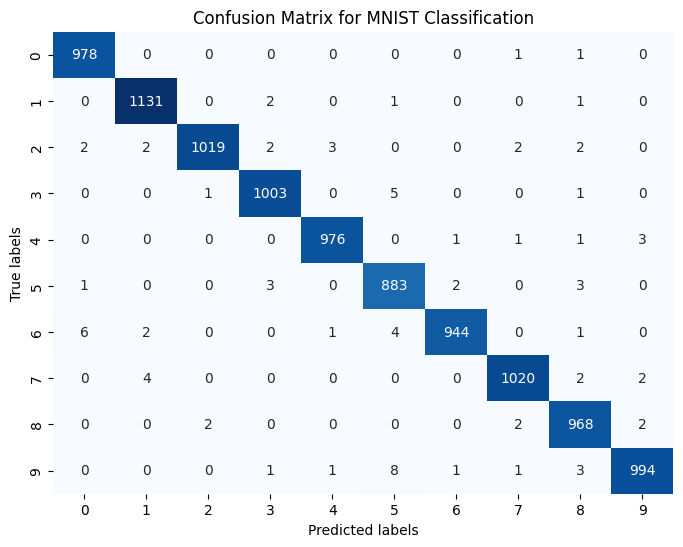

In [24]:
# Predict the test set
y_pred = np.argmax(model.predict(test_images), axis=-1)

# Create confusion matrix
cm = confusion_matrix(test_labels, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for MNIST Classification')
plt.show()

## Hyperparameter Tuning for Convolutional Neural Networks

* You can use the same strategies learned for tuning regular neural networks
* First, reduce the number of layers

In [25]:
# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
844/844 [==============================] - 5s 5ms/step - loss: 0.2143 - accuracy: 0.9375 - val_loss: 0.0682 - val_accuracy: 0.9825
Epoch 2/5
844/844 [==============================] - 5s 5ms/step - loss: 0.0695 - accuracy: 0.9787 - val_loss: 0.0826 - val_accuracy: 0.9748
Epoch 3/5
844/844 [==============================] - 5s 5ms/step - loss: 0.0478 - accuracy: 0.9858 - val_loss: 0.0507 - val_accuracy: 0.9867
Epoch 4/5
844/844 [==============================] - 5s 5ms/step - loss: 0.0350 - accuracy: 0.9890 - val_loss: 0.0540 - val_accuracy: 0.9843
Epoch 5/5
844/844 [==============================] - 5s 5ms/step - loss: 0.0273 - accuracy: 0.9918 - val_loss: 0.0533 - val_accuracy: 0.9857
313/313 - 0s - loss: 0.0514 - accuracy: 0.9835 - 431ms/epoch - 1ms/step

Test accuracy: 0.9835000038146973


* Remove the post-processing Dense layer

In [26]:
# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
844/844 [==============================] - 9s 11ms/step - loss: 0.2005 - accuracy: 0.9415 - val_loss: 0.0636 - val_accuracy: 0.9817
Epoch 2/5
844/844 [==============================] - 9s 10ms/step - loss: 0.0611 - accuracy: 0.9816 - val_loss: 0.0576 - val_accuracy: 0.9843
Epoch 3/5
844/844 [==============================] - 9s 11ms/step - loss: 0.0410 - accuracy: 0.9872 - val_loss: 0.0402 - val_accuracy: 0.9880
Epoch 4/5
844/844 [==============================] - 9s 11ms/step - loss: 0.0324 - accuracy: 0.9898 - val_loss: 0.0400 - val_accuracy: 0.9875
Epoch 5/5
844/844 [==============================] - 9s 11ms/step - loss: 0.0250 - accuracy: 0.9917 - val_loss: 0.0387 - val_accuracy: 0.9887
313/313 - 1s - loss: 0.0402 - accuracy: 0.9867 - 734ms/epoch - 2ms/step

Test accuracy: 0.9866999983787537


* Have more filters in the convolutional layers

In [27]:
# Build the model
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
844/844 [==============================] - 21s 24ms/step - loss: 0.1649 - accuracy: 0.9496 - val_loss: 0.0430 - val_accuracy: 0.9875
Epoch 2/5
844/844 [==============================] - 20s 24ms/step - loss: 0.0438 - accuracy: 0.9864 - val_loss: 0.0420 - val_accuracy: 0.9887
Epoch 3/5
844/844 [==============================] - 23s 27ms/step - loss: 0.0313 - accuracy: 0.9898 - val_loss: 0.0371 - val_accuracy: 0.9898
Epoch 4/5
844/844 [==============================] - 22s 26ms/step - loss: 0.0253 - accuracy: 0.9916 - val_loss: 0.0282 - val_accuracy: 0.9912
Epoch 5/5
844/844 [==============================] - 22s 26ms/step - loss: 0.0178 - accuracy: 0.9943 - val_loss: 0.0479 - val_accuracy: 0.9880
313/313 - 2s - loss: 0.0400 - accuracy: 0.9886 - 2s/epoch - 5ms/step

Test accuracy: 0.9886000156402588


* Add an extra pooling layer

In [43]:
# Build the model
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
844/844 [==============================] - 9s 10ms/step - loss: 0.2843 - accuracy: 0.9122 - val_loss: 0.0897 - val_accuracy: 0.9758
Epoch 2/5
844/844 [==============================] - 8s 10ms/step - loss: 0.0864 - accuracy: 0.9740 - val_loss: 0.0585 - val_accuracy: 0.9818
Epoch 3/5
844/844 [==============================] - 9s 11ms/step - loss: 0.0620 - accuracy: 0.9810 - val_loss: 0.0653 - val_accuracy: 0.9803
Epoch 4/5
844/844 [==============================] - 9s 10ms/step - loss: 0.0516 - accuracy: 0.9837 - val_loss: 0.0430 - val_accuracy: 0.9873
Epoch 5/5
844/844 [==============================] - 9s 11ms/step - loss: 0.0420 - accuracy: 0.9869 - val_loss: 0.0392 - val_accuracy: 0.9885
313/313 - 1s - loss: 0.0491 - accuracy: 0.9869 - 611ms/epoch - 2ms/step

Test accuracy: 0.9868999719619751


* Remove some pooling layers

In [ ]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
844/844 [==============================] - 17s 20ms/step - loss: 0.1597 - accuracy: 0.9502 - val_loss: 0.0626 - val_accuracy: 0.9820
Epoch 2/5
844/844 [==============================] - 17s 20ms/step - loss: 0.0492 - accuracy: 0.9852 - val_loss: 0.0389 - val_accuracy: 0.9892
Epoch 3/5
835/844 [============================>.] - ETA: 0s - loss: 0.0342 - accuracy: 0.9892

## A Few Warnings
* Because of the downsampling/dimensionality reduction performed by the convolutional and pooling layers, you can reduce the information passed onto the next layer to nothing (`ValueError`)
* Tips to fix these errors:
    * Reduce the number of layers, especially the number of pooling layers
    * Reduce the pool size (minimum is (2,2))
    * Use the `padding="same"` for the Conv2D layers
* These networks can take a very long time to train, especially with many filters, many layers, or a large amount of data